/home/joaquin/SAGURI_BOT/saguri-bot/Part2_IROS2023/nHHD
(320, 240, 2)


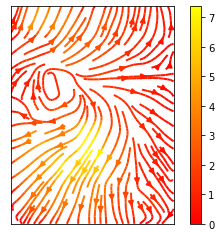

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os,cv2,time
print(os.getcwd())

#import logging
#LOGGER = logging.getLogger(__name__)

#from pynhhd import create_logger
#create_logger(logging.INFO)

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.debug("test")

LOGGER = logging.getLogger(__name__)
LOGGER.setLevel(logging.DEBUG)
LOGGER.debug("test")

from nHHD.examples.utils import drawing, fields

#%pylab inline --no-import-all

digit_shape = (0.017, 0.012)
dx = (0.05, 0.05)

f0 = cv2.imread("/home/joaquin/TACTILE/A.jpg")
f1 = cv2.imread("/home/joaquin/TACTILE/C.jpg")

def compute_channel_flow(f0,f1):
    return cv2.calcOpticalFlowFarneback(f0, f1, None, 0.5, 3, 32, 3, 5, 1.2, 0)

def compute_tactile_flow(f0, f1, channels=np.arange(3)):
    """ Compute optical flow channelwise and average """
    if not hasattr(channels, '__len__'): channels = [channels]
    flow = np.zeros(f1[:,:,:2].shape)
    for i in channels:
        flow_channel = compute_channel_flow(f0[:,:,i], f1[:,:,i])
        flow+=flow_channel
    return flow/len(channels)

vfield = compute_tactile_flow(f0, f1)
dims = vfield.shape[:2]
Y, X = np.mgrid[0:dims[0], 0:dims[1]]

mvf = np.linalg.norm(vfield, axis=2)
LOGGER.info('vf = {}, {}, {}'.format(mvf.shape, mvf.min(), mvf.max()))
vrng = (0, mvf.max())

print(vfield.shape)
plt.figure()
drawing.draw_slines(X,Y,vfield[:,:,0],vfield[:,:,1],vrng)
plt.show()

48.554420 ms


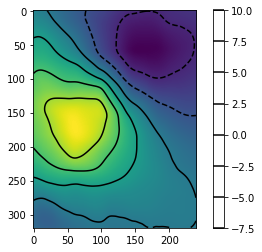

In [7]:
from pynhhd import nHHD

t0 = time.time()
nhhd = nHHD(grid=dims, spacings=dx)
nhhd.decompose(vfield)
print(f"{(time.time()-t0)*1000:.6f} ms")

plt.figure()
plt.imshow(nhhd.nRu)
CS = plt.contour(np.arange(0,nhhd.nRu.shape[1]), np.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')
plt.colorbar()

plt.show()

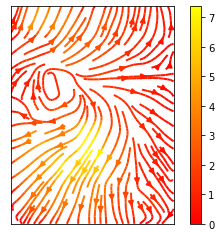

dict_keys(['mesh', 'psolver', 'dim', 'div', 'curlw', 'nD', 'nRu', 'd', 'r', 'h'])


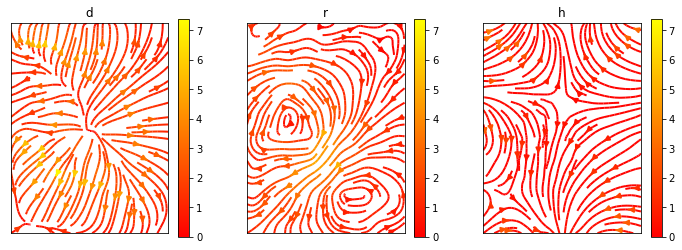

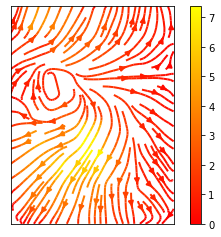

In [8]:
mr = np.linalg.norm(nhhd.r, axis=2)
md = np.linalg.norm(nhhd.d, axis=2)
mh = np.linalg.norm(nhhd.h, axis=2)

LOGGER.info('d = {}, {}, {}'.format(md.shape, md.min(), md.max())) #, numpy.linalg.norm(md)
LOGGER.info('r = {}, {}, {}'.format(mr.shape, mr.min(), mr.max())) #, numpy.linalg.norm(mr)
LOGGER.info('h = {}, {}, {}'.format(mh.shape, mh.min(), mh.max())) #, numpy.linalg.norm(mh)

plt.figure()
drawing.draw_slines(X,Y,vfield[:,:,0],vfield[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])\
#CS = plt.contour(numpy.arange(0,nhhd.nRu.shape[1]), numpy.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')
plt.show()

print(vars(nhhd).keys())

fig, ax = plt.subplots(1,3, figsize=[4*3, 4])
plt.sca(ax[0])
drawing.draw_slines(X,Y,nhhd.d[:,:,0],nhhd.d[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.title("d")
plt.sca(ax[1])
drawing.draw_slines(X,Y,nhhd.r[:,:,0],nhhd.r[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.title("r")
plt.sca(ax[2])
drawing.draw_slines(X,Y,nhhd.h[:,:,0],nhhd.h[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])
plt.title("h")
plt.show()

aux = nhhd.d+nhhd.r+nhhd.h

plt.figure()
drawing.draw_slines(X,Y,aux[:,:,0],aux[:,:,1],vrng)
plt.xlim([0,dims[1]-1])
plt.ylim([0,dims[0]-1])\
#CS = plt.contour(numpy.arange(0,nhhd.nRu.shape[1]), numpy.arange(0,nhhd.nRu.shape[0]), nhhd.nRu, colors='k')
plt.show()